**Automated Drug Classification with Web Scraping and Machine Learning


In this project, I aimed to predict the drug class of pharmaceutical drugs using a combination of web scraping and machine learning. The data for this project was extracted from the RXList website, which provides detailed information about drugs, including their brand names, generic names, and drug classes. By scraping this data and leveraging machine learning algorithms, I developed a model capable of classifying new drugs based on their names.

The objectives of the project were:


*   To scrape and extract drug information from the RXList website.

*   To preprocess the data and train a machine learning model.


*   To evaluate the model’s performance and make predictions.

*  To save the trained model, vectorizer, and encoder for future predictions.



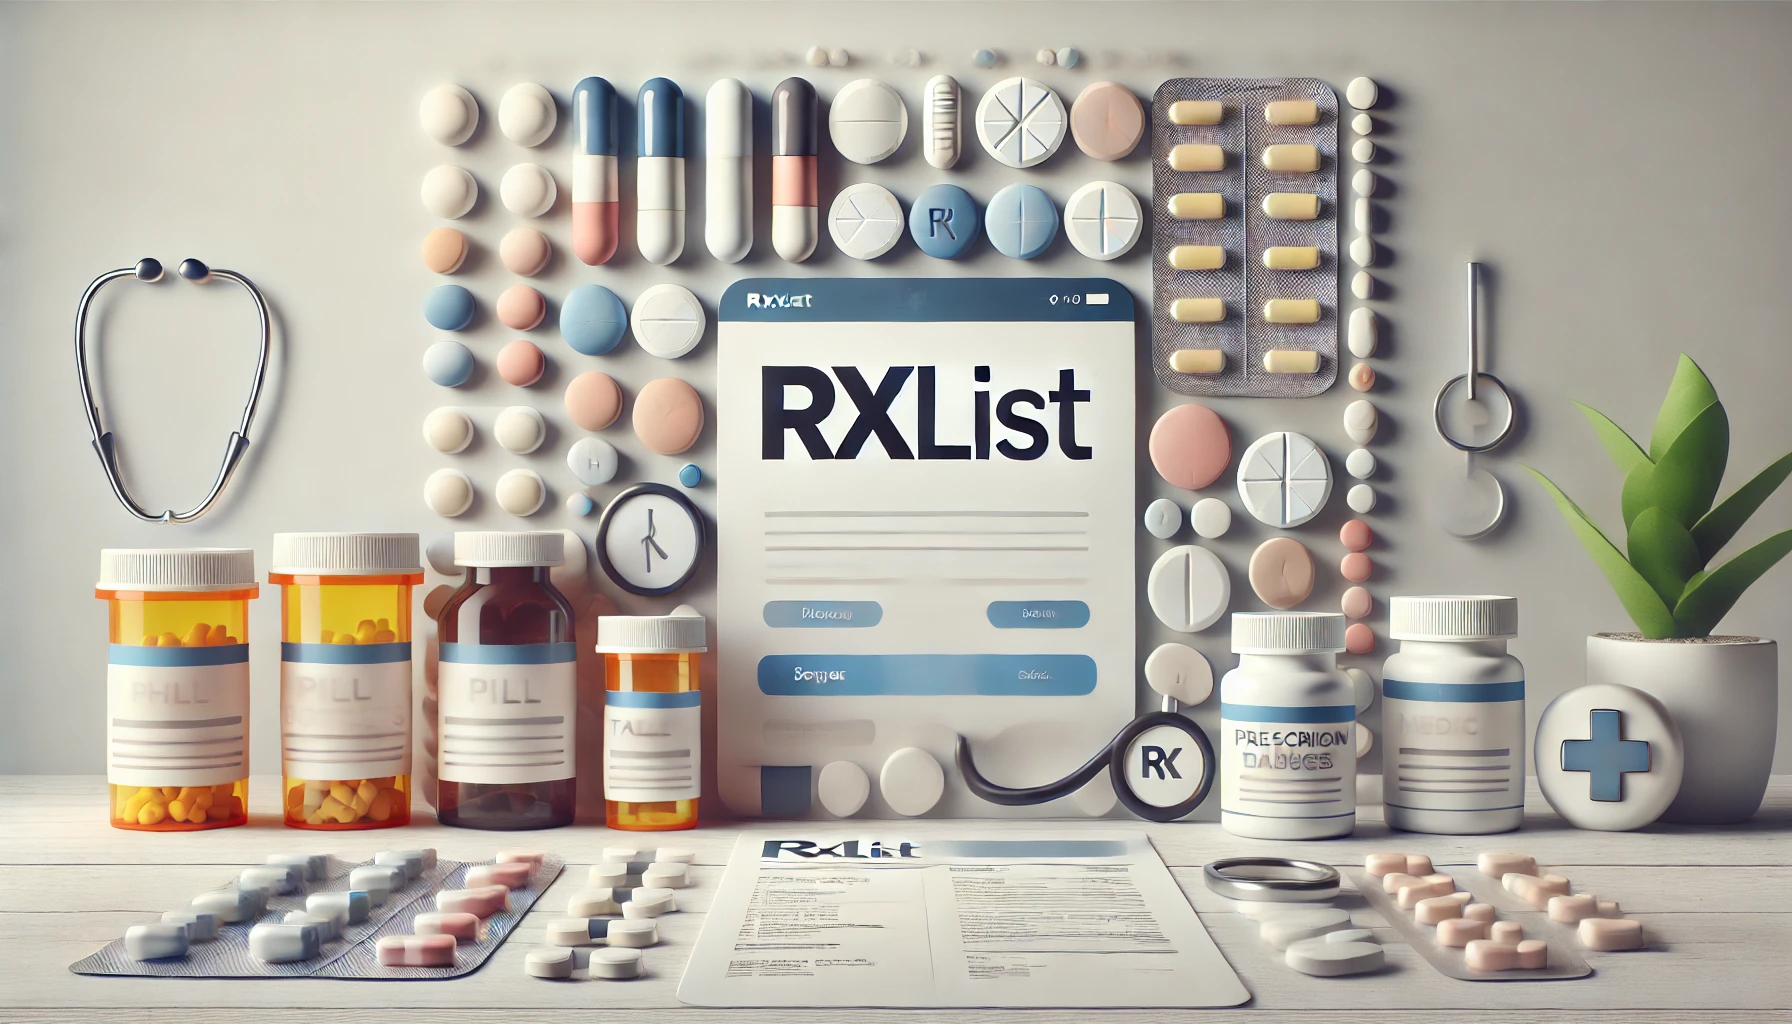

In [ ]:
#importing all necessary libraries
from bs4 import BeautifulSoup
import requests
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import joblib

In [ ]:
alphabets = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
final_url = []

for i in alphabets:
    url = f"https://www.rxlist.com/drugs/alpha_{i}.htm"
    final_url.append(url)

print(final_url)


['https://www.rxlist.com/drugs/alpha_a.htm', 'https://www.rxlist.com/drugs/alpha_b.htm', 'https://www.rxlist.com/drugs/alpha_c.htm', 'https://www.rxlist.com/drugs/alpha_d.htm', 'https://www.rxlist.com/drugs/alpha_e.htm', 'https://www.rxlist.com/drugs/alpha_f.htm', 'https://www.rxlist.com/drugs/alpha_g.htm', 'https://www.rxlist.com/drugs/alpha_h.htm', 'https://www.rxlist.com/drugs/alpha_i.htm', 'https://www.rxlist.com/drugs/alpha_j.htm', 'https://www.rxlist.com/drugs/alpha_k.htm', 'https://www.rxlist.com/drugs/alpha_l.htm', 'https://www.rxlist.com/drugs/alpha_m.htm', 'https://www.rxlist.com/drugs/alpha_n.htm', 'https://www.rxlist.com/drugs/alpha_o.htm', 'https://www.rxlist.com/drugs/alpha_p.htm', 'https://www.rxlist.com/drugs/alpha_q.htm', 'https://www.rxlist.com/drugs/alpha_r.htm', 'https://www.rxlist.com/drugs/alpha_s.htm', 'https://www.rxlist.com/drugs/alpha_t.htm', 'https://www.rxlist.com/drugs/alpha_u.htm', 'https://www.rxlist.com/drugs/alpha_v.htm', 'https://www.rxlist.com/drugs/a

In [ ]:

links = []
for i in final_url:
    url = i
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')

    div_elements = soup.find_all('div', attrs={"class": "AZ_results"})

    for div in div_elements:
        a_tags = div.find_all('a')
        for a_tag in a_tags:
            links.append(a_tag.get('href'))



In [ ]:
Final_link_list = []

for i in links:
    if i and i.startswith("https"):
        Final_link_list.append(i)

print(Final_link_list)
print(len(Final_link_list))

['https://www.rxlist.com/a-methapred-drug.htm', 'https://www.rxlist.com/kivexa-drug.htm', 'https://www.rxlist.com/ziagen-drug.htm', 'https://www.rxlist.com/epzicom-drug.htm', 'https://www.rxlist.com/trizivir-drug.htm', 'https://www.rxlist.com/triumeq-drug.htm', 'https://www.rxlist.com/tymlos-drug.htm', 'https://www.rxlist.com/xeglyze-drug.htm', 'https://www.rxlist.com/plenaxis-drug.htm', 'https://www.rxlist.com/orencia-drug.htm', 'https://www.rxlist.com/reopro-drug.htm', 'https://www.rxlist.com/abecma-drug.htm', 'https://www.rxlist.com/abelcet-drug.htm', 'https://www.rxlist.com/verzenio-drug.htm', 'https://www.rxlist.com/abilify-drug.htm', 'https://www.rxlist.com/abilify-asimtufii-drug.htm', 'https://www.rxlist.com/abilify-maintena-drug.htm', 'https://www.rxlist.com/abilify-mycite-drug.htm', 'https://www.rxlist.com/zytiga-drug.htm', 'https://www.rxlist.com/yonsa-drug.htm', 'https://www.rxlist.com/ablavar-drug.htm', 'https://www.rxlist.com/ablysinol-drug.htm', 'https://www.rxlist.com/dy

In [ ]:
for link in Final_link_list:
    print(link)

Streaming output truncated to the last 5000 lines.
https://www.rxlist.com/boniva-drug.htm
https://www.rxlist.com/boniva-injection-drug.htm
https://www.rxlist.com/ibrance-drug.htm
https://www.rxlist.com/brexafemme-drug.htm
https://www.rxlist.com/zevalin-drug.htm
https://www.rxlist.com/imbruvica-drug.htm
https://www.rxlist.com/ibsrela-drug.htm
https://www.rxlist.com/ibuprofen-drug.htm
https://www.rxlist.com/duexis-drug.htm
https://www.rxlist.com/caldolor-drug.htm
https://www.rxlist.com/neoprofen-drug.htm
https://www.rxlist.com/corvert-drug.htm
https://www.rxlist.com/ic-green-drug.htm
https://www.rxlist.com/firazyr-drug.htm
https://www.rxlist.com/sajazir-drug.htm
https://www.rxlist.com/iclevia-drug.htm
https://www.rxlist.com/iclusig-drug.htm
https://www.rxlist.com/extraneal-drug.htm
https://www.rxlist.com/vascepa-drug.htm
https://www.rxlist.com/idacio-drug.htm
https://www.rxlist.com/idamycin-drug.htm
https://www.rxlist.com/idamycin-pfs-drug.htm
https://www.rxlist.com/idamycin-drug.htm
htt

In [ ]:


drug_info = {}

url = 'https://www.rxlist.com/boniva-drug.htm#description'
page = requests.get(url)

if page.status_code != 200: #  if the page request was successfull or not
    print(f"Failed to retrieve {url}")
else:
    soup = BeautifulSoup(page.content, 'html.parser')

    # Extracting the Brand Name from the <h1> tag as brand name is in h1 tag
    h1_tag = soup.find('h1')
    if h1_tag:
        brand_name = h1_tag.get_text(strip=True)
        drug_info['Brand Name'] = brand_name
        print(f"Brand Name: {brand_name}")

    # as the name of medicine is in  the <div> tags with class 'hero'
    div_elements = soup.find_all('div', attrs={"class": "hero"})

    for div in div_elements:
        # Finding the <ul> inside the <div class="hero"> as inside each hero theres is list which contains genric name,drug class,brand name
        ul_tag = div.find('ul')
        if ul_tag:
            # for all <li> tags inside the <ul>
            li_tags = ul_tag.find_all('li')

            for li in li_tags:
                # Extracting the Generic Name if not there i am giving as none
                if 'Generic Name' in li.get_text():
                    generic_name = li.find('a').get_text(strip=True) if li.find('a') else None
                    drug_info['Generic Name'] = generic_name
                    print(f"Generic Name: {generic_name}")

                # Extract the Drug Classes
                if 'Drug Class' in li.get_text():
                    a_tags = li.find_all('a')
                    drug_classes = [a.get_text(strip=True) for a in a_tags]
                    drug_info['Drug Classes'] = drug_classes
                    print(f"Drug Classes: {', '.join(drug_classes)}")
                    #adding each info to drug_info

print("\nDrug Info Dictionary:")
print(drug_info)
#this was for a single medicine to check the code now  for multiple link we need to extract

Brand Name: Boniva
Generic Name: ibandronate sodium
Drug Classes: Bisphosphonate Derivatives, Calcium Metabolism Modifiers

Drug Info Dictionary:
{'Brand Name': 'Boniva', 'Generic Name': 'ibandronate sodium', 'Drug Classes': ['Bisphosphonate Derivatives', 'Calcium Metabolism Modifiers']}


In [ ]:


# Initialize the list to store drug information for all URLs
final_drug_info_list = []

for url in Final_link_list:
    drug_info = {}

    # Sending a request to the URL
    page = requests.get(url)

    # Checking if the page request was successful (status code 200)
    if page.status_code != 200:
        print(f"Failed to retrieve {url}")
        continue  # if the page is not responding then continue

    soup = BeautifulSoup(page.content, 'html.parser')

    # Extractng the Brand Name from the <h1> tag
    h1_tag = soup.find('h1')
    if h1_tag:
        brand_name = h1_tag.get_text(strip=True)
        drug_info['Brand Name'] = brand_name
        print(f"Brand Name: {brand_name}")

    # Finding all the <div> tags with class 'hero' because it contains the ifo about the medicine
    div_elements = soup.find_all('div', attrs={"class": "hero"})

    for div in div_elements:# Finding the <ul> inside the <div class="hero">
        ul_tag = div.find('ul')
        if ul_tag:
            li_tags = ul_tag.find_all('li')

            for li in li_tags:
                if 'Generic Name' in li.get_text():
                    generic_name = li.find('a').get_text(strip=True) if li.find('a') else None# Extracting the Generic Name
                    drug_info['Generic Name'] = generic_name
                    print(f"Generic Name: {generic_name}")

                if 'Drug Class' in li.get_text():
                    a_tags = li.find_all('a')
                    drug_classes = [a.get_text(strip=True) for a in a_tags]# Extracting the Drug Classes
                    drug_info['Drug Classes'] = drug_classes
                    print(f"Drug Classes: {', '.join(drug_classes)}")

    # appending the drug information for the current URL to the final list
    final_drug_info_list.append(drug_info)

# final_list
print("\nFinal Drug Info List:")
for info in final_drug_info_list:
    print(info)


Streaming output truncated to the last 5000 lines.
{'Brand Name': 'Boniva', 'Generic Name': 'ibandronate sodium', 'Drug Classes': ['Bisphosphonate Derivatives', 'Calcium Metabolism Modifiers']}
{'Brand Name': 'Boniva Injection', 'Generic Name': 'ibandronate sodium injection', 'Drug Classes': ['Calcium Metabolism Modifiers', 'Bisphosphonate Derivatives']}
{'Brand Name': 'Ibrance', 'Generic Name': 'palbociclib capsules for oral administration', 'Drug Classes': ['Antineoplastics CDK Inhibitors']}
{'Brand Name': 'Brexafemme', 'Generic Name': 'ibrexafungerp tablets', 'Drug Classes': ['Antifungals, Systemic']}
{'Brand Name': 'Zevalin', 'Generic Name': None, 'Drug Classes': ['Antineoplastics, Anti-CD20 Monoclonal Antibodies']}
{'Brand Name': 'Imbruvica', 'Generic Name': 'ibrutinib capsules', 'Drug Classes': ['Antineoplastic Tyrosine Kinase Inhibitors']}
{'Brand Name': 'Ibsrela', 'Generic Name': 'tenapanor tablets', 'Drug Classes': ['IBS Agents']}
{'Brand Name': 'Ibuprofen', 'Generic Name': 'i

In [ ]:
import pandas as pd
#importing libraries

In [ ]:
drug_info_df = pd.DataFrame([{
    'Brand Name': info.get('Brand Name', ''),
    'Generic Name': info.get('Generic Name', ''),
    'Drug Classes': ', '.join(info.get('Drug Classes', []))  # Use an empty list if 'Drug Classes' is missing
} for info in final_drug_info_list])


drug_info_df

Brand Name                                       Generic Name  \
0          A-Methapred                                               None   
1               Kivexa                                               None   
2               Ziagen                                   abacavir sulfate   
3              Epzicom            abacavir sulfate and lamivudine tablets   
4             Trizivir                                               None   
...                ...                                                ...   
8792  Zyprexa Relprevv  olanzapine extended release injectable suspension   
8793            Zyrtec                                         cetirizine   
8794          Zyrtec-D                        cetirizine, pseudoephedrine   
8795            Zytiga                                               None   
8796             Zyvox                                          linezolid   

                                           Drug Classes  
0                                       Corticosteroids  
1                                                        
2                    HIV, NNRTIs, Antiretroviral Agents  
3                                           HIV, NNRTIs  
4                                           HIV, NNRTIs  
...                                                 ...  
8792  How Do Second Generation Antipsychotics Work?,...  
8793  How Do Second Generation Antihistamines Work?,...  
8794                  Antihistamine/Decongestant Combos  
8795       Antineoplastics, Antiandrogen, Antiandrogens  
8796                 Antibiotics, Other, Oxazolidinones  

[8797 rows x 3 columns]

In [ ]:
# Saving the DataFrame to a CSV file
drug_info_df.to_csv('drug_info.csv', index=False)  # index=False avoids saving the index as a separate column


In [ ]:
drug_info_df.describe(include=['object', 'category'])


Brand Name                                  Generic Name Drug Classes
count          8797                                          7019         8797
unique         4467                                          3164         1070
top     A-Methapred  levonorgestrel and ethinyl estradiol tablets             
freq              2                                            32         1081

In [ ]:
drug_info_df.isnull().sum()

Brand Name         0
Generic Name    1778
Drug Classes       0
dtype: int64

In [ ]:
print(drug_info_df.isnull().sum())
#there were 1778 null values means there are no generic name for drug mentioned in rx list

Brand Name         0
Generic Name    1778
Drug Classes       0
dtype: int64


In [ ]:
drug_info_df_cleaned = drug_info_df.dropna()
print(drug_info_df_cleaned.isnull().sum())


Brand Name      0
Generic Name    0
Drug Classes    0
dtype: int64


In [ ]:
pd.set_option('display.max_rows', None)


In [ ]:
drug_info_df_cleaned.describe(include='object')

Brand Name                                  Generic Name Drug Classes
count        7019                                          7019         7019
unique       3548                                          3164         1011
top        Ziagen  levonorgestrel and ethinyl estradiol tablets             
freq            2                                            32          185

In [ ]:
drug_info_df_cleaned

Brand Name  \
2                                                Ziagen   
3                                               Epzicom   
5                                               Triumeq   
6                                                Tymlos   
9                                               Orencia   
10                                               ReoPro   
11                                               Abecma   
12                                              Abelcet   
13                                             Verzenio   
14                                              Abilify   
15                                    Abilify Asimtufii   
16                                     Abilify Maintena   
17                                       Abilify MyCite   
19                                                Yonsa   
22                                              Dysport   
23                                             Abraxane   
24                                               Abreva   
25                                             Abrilada   
26                                              Cibinqo   
27                                              Abrysvo   
33                                             Absorica   
34                                          Absorica LD   
35                                              Abstral   
36                                            Calquence   
38                                              Campral   
39                                               Acanya   
40                                              Precose   
41                                             Accolate   
42                                          Accretropin   
43                                             Accrufer   
44                                              AccuNeb   
45                                             Accupril   
46                                            Accuretic   
47                                             Accutane   
49                                              Sectral   
51                                                Aceon   
52                                              Acephen   
53                                            Acetadote   
54                                              Tylenol   
55                                      Tylenol-Codeine   
56                                        Combogesic IV   
57                                           Combogesic   
58                                              Ofirmev   
59                                              Acephen   
60                                               Trezix   
61                                               Midrin   
64                         Diamox Tablets and Injection   
65                                       Diamox Sequels   
66                                          Acetic Acid   
67                                            Lithostat   
69                                            Miochol-E   
71                                             Legubeti   
72                                            Acetadote   
73                              Acetylcysteine Solution   
75                                         Achromycin V   
77                                               Acidul   
78                                              Aciphex   
79                                     Aciphex Sprinkle   
80                                            Soriatane   
81                                     Tudorza Pressair   
82                                     Duaklir Pressair   
83                                             Aclovate   
84                                                Acova   
86                                              Actemra   
87                                               Acthib   
89                                              Acticin   
90                                            Acticlate   
92                               

In [ ]:
print((drug_info_df_cleaned['Drug Classes'] == '').sum())   # Empty strings

185


In [ ]:
# Checking for NaN and empty string values in 'Brand Name', 'Generic Name', and 'Drug Classes'
print("Missing values in 'Brand Name':")
print(drug_info_df_cleaned['Brand Name'].isnull().sum())  # NaN values in 'Brand Name'
print((drug_info_df_cleaned['Brand Name'] == '').sum())   # Empty string values in 'Brand Name'

print("\nMissing values in 'Generic Name':")
print(drug_info_df_cleaned['Generic Name'].isnull().sum())  # NaN values in 'Generic Name'
print((drug_info_df_cleaned['Generic Name'] == '').sum())   # Empty string values in 'Generic Name'

print("\nMissing values in 'Drug Classes':")
print(drug_info_df_cleaned['Drug Classes'].isnull().sum())  # NaN values in 'Drug Classes'
print((drug_info_df_cleaned['Drug Classes'] == '').sum())   # Empty string values in 'Drug Classes')


Missing values in 'Brand Name':
0
0

Missing values in 'Generic Name':
0
0

Missing values in 'Drug Classes':
0
185


In [ ]:
# Droping dowwn  rows where 'Drug Classes' is an empty string
drug_info_df_cleaned = drug_info_df_cleaned[drug_info_df_cleaned['Drug Classes'] != '']

# Verifying wether  that there are no empty strings left
print(f"Missing values in 'Drug Classes' after cleaning: {drug_info_df_cleaned['Drug Classes'].isnull().sum()}")
print(f"Empty string values in 'Drug Classes' after cleaning: {(drug_info_df_cleaned['Drug Classes'] == '').sum()}")


Missing values in 'Drug Classes' after cleaning: 0
Empty string values in 'Drug Classes' after cleaning: 0


In [ ]:
#data is cleaned

In [ ]:
drug_info_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6834 entries, 2 to 8796
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand Name    6834 non-null   object
 1   Generic Name  6834 non-null   object
 2   Drug Classes  6834 non-null   object
dtypes: object(3)
memory usage: 213.6+ KB


In [ ]:
drug_info_df_cleaned.shape

(6834, 3)

In [ ]:

df = drug_info_df_cleaned
#our dataframe
#precheck for missing values
print("Missing values in the dataset:")
print(df.isnull().sum())

# Vectorizing text data (combine Brand Name and Generic Name)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Brand Name'] + ' ' + df['Generic Name'])

# Encoding target variable (Drug Classes)
encoder = LabelEncoder()
y = encoder.fit_transform(df['Drug Classes'])

# splitting data into train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# making Prediction  on the test set
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

joblib.dump(model, 'drug_class_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')
joblib.dump(encoder, 'encoder.pkl')
# Saving the model, vectorizer, and encoder as .pkl files

print("Model, vectorizer, and encoder saved as .pkl files.")


Missing values in the dataset:
Brand Name      0
Generic Name    0
Drug Classes    0
dtype: int64
Model Accuracy: 86.91%
Model, vectorizer, and encoder saved as .pkl files.


In [ ]:
# List of test inputs (Brand Name + Generic Name)
test_inputs = [
    "Panadol Paracetamol",
    "Advil Ibuprofen",
    "Lipitor Atorvastatin",
    "Nexium Esomeprazole",
    "Prozac Fluoxetine",
    "Zithromax Azithromycin",
    "Lasix Furosemide",
    "Humalog Insulin Lispro",
    'Mounjaro tirzepatide',
    'Otezla apremilast [a-PRE-mi-last]',
    'ZEXIPAG 200 Tablet 10 Selexipag 200 mcg',
    'Zandu Balm 9 ML Ajwain Trachyspermum (0.75 %) + Eucalyptus Oil (0.8 %) + Gaultheria Fragrantissima (12 %) + Pudina Satva (12 %)',
    "Glucophage Metformin",
    'A-doc sp aceclofenac,paracetamol and serraitiopeptidase',
    'Dettol Chloroxylenol',
    'Seromycin Cycloserine',
    'Pyrazinamide Pyrazinamide ',
    'Deltyba Delamanid',
    'Priligy Dapoxetine',
    'Cogniza Cerebroprotein Hydrolysate',
    'CILOBACT Cilostazol ',
    'profine Progesterone'
]

#checking qith various inputs
for test_input in test_inputs:
    # vectorizing the input data as that we did in train
    input_vectorized = vectorizer.transform([test_input])
    predicted_class_encoded = model.predict(input_vectorized)# Predicting the encoded drug class
    predicted_class = encoder.inverse_transform(predicted_class_encoded)
    print(f"Input: {test_input} -> Predicted Drug Class: {predicted_class[0]}")


Input: Panadol Paracetamol -> Predicted Drug Class: NSAIDs
Input: Advil Ibuprofen -> Predicted Drug Class: NSAIDs
Input: Lipitor Atorvastatin -> Predicted Drug Class: Lipid-Lowering Agents, Statins, HMG-CoA Reductase Inhibitors
Input: Nexium Esomeprazole -> Predicted Drug Class: Proton Pump Inhibitors
Input: Prozac Fluoxetine -> Predicted Drug Class: Antidepressants, SSRIs, 
Input: Zithromax Azithromycin -> Predicted Drug Class: Macrolides
Input: Lasix Furosemide -> Predicted Drug Class: How Do Loop Diuretics Work?
Input: Humalog Insulin Lispro -> Predicted Drug Class: Antidiabetics, Insulins, Antidiabetics, Rapid-Acting Insulins
Input: Mounjaro tirzepatide -> Predicted Drug Class: Antidiabetics, Glucagon-like Peptide-1 Agonists
Input: Otezla apremilast [a-PRE-mi-last] -> Predicted Drug Class: DMARDs, PDE4 Inhibitors
Input: ZEXIPAG 200 Tablet 10 Selexipag 200 mcg -> Predicted Drug Class: PAH, Prostacyclin Agonists
Input: Zandu Balm 9 ML Ajwain Trachyspermum (0.75 %) + Eucalyptus Oil (0

In [ ]:
# Checking  if our input med exists in any column
drug_name = "profine"

if df.apply(lambda row: row.astype(str).str.contains(drug_name, case=False).any(), axis=1).any():
    print(f"'{drug_name}' is present in the dataset.")
else:
    print(f"'{drug_name}' is not present in the dataset.")


'profine' is not present in the dataset.
